# I. 모델 학습에 사용되지 않은 기타소음 데이터 프레임 생성

In [1]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

2025-03-07 13:49:56.492682: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 13:49:56.542558: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-07 13:49:57.360191: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-03-07 13:49:58.367972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 13:49:58.377595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 13:49:58.379075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
tf.config.set_visible_devices([], 'GPU')

2025-03-07 13:50:04.377240: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 13:50:04.379004: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 13:50:04.380447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
import os
import json
import pandas as pd

def load_and_flatten_json(root_dir):
    data = []
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.json'):
                filepath = os.path.join(subdir, file)
                with open(filepath, 'r', encoding='utf-8') as f:
                    try:
                        json_data = json.load(f)
                        info = json_data.get('info', {})
                        license_info = json_data.get('license', {})
                        audio = json_data.get('audio', {})
                        environment = json_data.get('environment', {})
                        annotations = json_data.get('annotations', [])

                        area_start = None
                        area_end = None
                        category_01 = None
                        category_02 = None
                        category_03 = None
                        labelName = None
                        soundQuality = None
                        decibel = None
                        subCategory = None

                        if annotations and isinstance(annotations, list) and len(annotations) > 0:
                            annotation = annotations[0]
                            if isinstance(annotation, dict):
                                area = annotation.get('area', {})
                                area_start = area.get('start')
                                area_end = area.get('end')
                                categories = annotation.get('categories', {})
                                category_01 = categories.get('category_01')
                                category_02 = categories.get('category_02')
                                category_03 = categories.get('category_03')
                                labelName = annotation.get('labelName')
                                soundQuality = annotation.get('soundQuality')
                                decibel = annotation.get('decibel')
                                subCategory = annotation.get('subCategory')

                        row = {
                            'area_start': area_start,
                            'area_end': area_end,
                            'category_01': category_01,
                            'category_02': category_02,
                            'category_03': category_03,
                            'decibel': decibel,
                            'labelName': labelName,
                            'soundQuality': soundQuality,
                            'subCategory': subCategory,
                            'bitRate': audio.get('bitRate'),
                            'duration': audio.get('duration'),
                            'fileFormat': audio.get('fileFormat'),
                            'fileName': audio.get('fileName'),
                            'fileSize': audio.get('fileSize'),
                            'recodingType': audio.get('recodingType'),
                            'sampleRate': audio.get('sampleRate'),
                            'acqDevice': environment.get('acqDevice'),
                            'acqMethod': environment.get('acqMethod'),
                            'acqType': environment.get('acqType'),
                            'areaUse': environment.get('areaUse'),
                            'dayNight': environment.get('dayNight'),
                            'direction': environment.get('direction'),
                            'distance': environment.get('distance'),
                            'district': environment.get('district'),
                            'latitude': environment.get('gps', {}).get('latitude'),
                            'longitude': environment.get('gps', {}).get('longitude'),
                            'micClass': environment.get('micClass'),
                            'obstacle': environment.get('obstacle'),
                            'place': environment.get('place'),
                            'recordingTime': environment.get('recordingTime'),
                            'urban': environment.get('urban'),
                            'weather': environment.get('weather'),
                            'contributor': info.get('contributor'),
                            'dateCreated': info.get('dateCreated'),
                            'description': info.get('description'),
                            'uri': info.get('uri'),
                            'version': info.get('version'),
                            'year': info.get('year'),
                            'license_name': license_info.get('name'),
                            'license_url': license_info.get('url'),
                        }
                        data.append(row)
                    except json.JSONDecodeError as e:
                        print(f"Error decoding JSON file: {filepath} - {e}")
    return pd.DataFrame(data)

# JSON 파일 로드 및 평탄화
root_dir_2 = '/home/ubuntu/data/etc_noise_data_test_other'
etc_json_df = load_and_flatten_json(root_dir_2)

print("\n기타 소음 JSON 데이터프레임:")
print(etc_json_df.head())
print(etc_json_df.info())


기타 소음 JSON 데이터프레임:
   area_start  area_end category_01 category_02 category_03  decibel  \
0        4.47    62.220        생활소음          가전         청소기       51   
1        0.35    58.630        생활소음          가전         청소기       79   
2        0.17    30.360        생활소음          가전         청소기      117   
3        0.05    59.000        생활소음          가전         청소기       87   
4        2.00    22.558        생활소음          가전         청소기       49   

          labelName soundQuality subCategory   bitRate  ...  urban weather  \
0  6.가전_76225_1.wav           정상         청소기   705kbps  ...  서울특별시      맑음   
1  6.가전_47589_1.wav           정상         청소기   705kbps  ...  서울특별시      맑음   
2  6.가전_45929_1.wav           정상         청소기  1411kbps  ...  서울특별시      맑음   
3  6.가전_77080_1.wav           정상         청소기  1411kbps  ...  인천광역시      맑음   
4   6.가전_5390_1.wav           정상         청소기  1411kbps  ...  서울특별시      흐림   

  contributor  dateCreated description                      uri version  year 

In [5]:
import librosa
import numpy as np
import os
import pandas as pd
import re
import json

# 한글-영어 매칭 딕셔너리 보완
kor_eng_dict = {
    "자동차": "car",
    "이륜자동차": "motorcycle",
    "경적": "horn",
    "사이렌": "siren",
    "주행음": "driving_sound",
    # 필요한 모든 매핑 추가
}

# 파일명 정규화 함수 수정
def normalize_filename(filename):
    # 확장자 제거
    name, ext = os.path.splitext(filename)

    # 대소문자 변환 및 공백 제거
    name = name.lower().replace(' ', '')

    # 한글-영어 변환 적용
    for kor, eng in kor_eng_dict.items():
        name = name.replace(kor, eng)

    # 정규식으로 고유 ID 추출
    match = re.match(r".*?_(\d+)(?:_\d+)?$", name)
    if match:
        file_id = match.group(1)
    else:
        file_id = None

    return name, ext, file_id

# 매칭 검사 함수 수정
def find_mismatched_files(directory):
    wav_files = {}
    json_files = {}

    # 모든 폴더 순회하며 파일 수집
    for root, _, files in os.walk(directory):
        for file in files:
            name, ext, file_id = normalize_filename(file)
            if file_id is None:
                continue  # ID가 없는 파일은 패스
            file_path = os.path.join(root, file)
            if ext == ".wav":
                wav_files[file_id] = file_path
            elif ext == ".json":
                json_files[file_id] = file_path

    # 매칭되지 않은 파일 찾기
    mismatched_wav = set(wav_files.keys()) - set(json_files.keys())
    mismatched_json = set(json_files.keys()) - set(wav_files.keys())

    return mismatched_wav, mismatched_json, wav_files, json_files

def extract_mfcc(wav_path):
    """
    주어진 WAV 파일 경로에서 MFCC 특징을 추출합니다.
    """
    try:
        audio, sr = librosa.load(wav_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=50)
        mfcc_mean = np.mean(mfcc, axis=1).tolist()
        return mfcc_mean
    except Exception as e:
        print(f"Error processing WAV file: {wav_path} - {e}")
        return None

def load_wav_and_extract_mfcc(root_dir, df_json):
    """
    주어진 디렉토리의 모든 WAV 파일을 로드하고 MFCC 특징을 추출하여 DataFrame에 추가합니다.
    """
    mfcc_data = []
    for index, row in df_json.iterrows():
        wav_filename = row['fileName']
        wav_path = None

        # JSON 파일 이름 정규화
        json_name, _, json_id = normalize_filename(wav_filename)

        # 모든 하위 디렉토리에서 WAV 파일 검색
        for subdir, dirs, files in os.walk(root_dir):
            for file in files:
                wav_name, _, wav_id = normalize_filename(file)
                if json_id == wav_id and file.endswith('_1.wav'):  # ID가 일치하고 _1로 끝나는 파일
                    wav_path = os.path.join(subdir, file)
                    break

        if wav_path:
            mfcc_features = extract_mfcc(wav_path)
            mfcc_data.append(mfcc_features)
        else:
            print(f"WAV file not found for: {wav_filename}, looking for ID: {json_id}")
            mfcc_data.append(None)

    mfcc_columns = [f'mfcc_{i+1}' for i in range(50)]
    df_mfcc = pd.DataFrame(mfcc_data, columns=mfcc_columns)
    return pd.concat([df_json, df_mfcc], axis=1)

# JSON 파일 로드 및 평탄화
root_dir_2 = '/home/ubuntu/data/etc_noise_data_test_other'
etc_json_df = load_and_flatten_json(root_dir_2)

# WAV 파일 로드 및 MFCC 추출
df_final_2 = load_wav_and_extract_mfcc(root_dir_2, etc_json_df)
print(df_final_2.head())

   area_start  area_end category_01 category_02 category_03  decibel  \
0        4.47    62.220        생활소음          가전         청소기       51   
1        0.35    58.630        생활소음          가전         청소기       79   
2        0.17    30.360        생활소음          가전         청소기      117   
3        0.05    59.000        생활소음          가전         청소기       87   
4        2.00    22.558        생활소음          가전         청소기       49   

          labelName soundQuality subCategory   bitRate  ...   mfcc_41  \
0  6.가전_76225_1.wav           정상         청소기   705kbps  ... -1.863527   
1  6.가전_47589_1.wav           정상         청소기   705kbps  ... -3.491574   
2  6.가전_45929_1.wav           정상         청소기  1411kbps  ... -0.153434   
3  6.가전_77080_1.wav           정상         청소기  1411kbps  ... -2.305894   
4   6.가전_5390_1.wav           정상         청소기  1411kbps  ...  4.008397   

    mfcc_42   mfcc_43   mfcc_44   mfcc_45   mfcc_46   mfcc_47   mfcc_48  \
0  8.110558  0.582024 -3.542713 -1.612815  3.155624 -

In [6]:
# df_combined의 열 목록 가져오기
df_combined = pd.read_csv("final_test_data_original.csv")
combined_cols = df_combined.columns.tolist()

# df_final_2에서 df_combined에 있는 열만 선택
final_cols = [col for col in combined_cols if col in df_final_2.columns]
df_final_2 = df_final_2[final_cols]

# df_final_2의 열 순서를 df_combined의 열 순서에 맞춰 변경
df_final_2 = df_final_2[combined_cols[:len(final_cols)]]

print(df_final_2)

             fileName          labelName  area_start  area_end category_01  \
0      6.가전_76225.wav   6.가전_76225_1.wav        4.47    62.220        생활소음   
1      6.가전_47589.wav   6.가전_47589_1.wav        0.35    58.630        생활소음   
2      6.가전_45929.wav   6.가전_45929_1.wav        0.17    30.360        생활소음   
3      6.가전_77080.wav   6.가전_77080_1.wav        0.05    59.000        생활소음   
4       6.가전_5390.wav    6.가전_5390_1.wav        2.00    22.558        생활소음   
...               ...                ...         ...       ...         ...   
1369  3.항공기_88576.wav  3.항공기_88576_1.wav        2.00     6.808        교통소음   
1370  3.항공기_89204.wav  3.항공기_89204_1.wav        2.00     8.350        교통소음   
1371  3.항공기_65952.wav  3.항공기_65952_1.wav        0.08    13.480        교통소음   
1372  3.항공기_89723.wav  3.항공기_89723_1.wav        2.00    10.002        교통소음   
1373  3.항공기_90659.wav  3.항공기_90659_1.wav        2.00     6.511        교통소음   

     category_02 category_03  decibel soundQuality subCategory 

In [9]:
# df_result에서 실제 라벨을 기준으로 정상 데이터와 기타 소음 라벨링
valid_labels = ['차량경적', '차량주행음', '이륜차경적', '이륜차주행음', '차량사이렌']  # 정상 라벨

# 'category_03' 컬럼이 정상 라벨이면 그대로 두고, 그렇지 않으면 '기타소음'으로 설정
df_final_2['ood_label'] = df_final_2['category_03'].apply(lambda x: x if x in valid_labels else '기타소음')

In [10]:
import pandas as pd

# 현재 데이터프레임 원본을 CSV 파일로 저장
df_final_2.to_csv('untrained other noises.csv', index=False)

# II. 모델 단독 분류 성능 평가

## 1) V4

X_test shape: (1374, 50, 1)
43/43 [==============================] - 1s 7ms/step


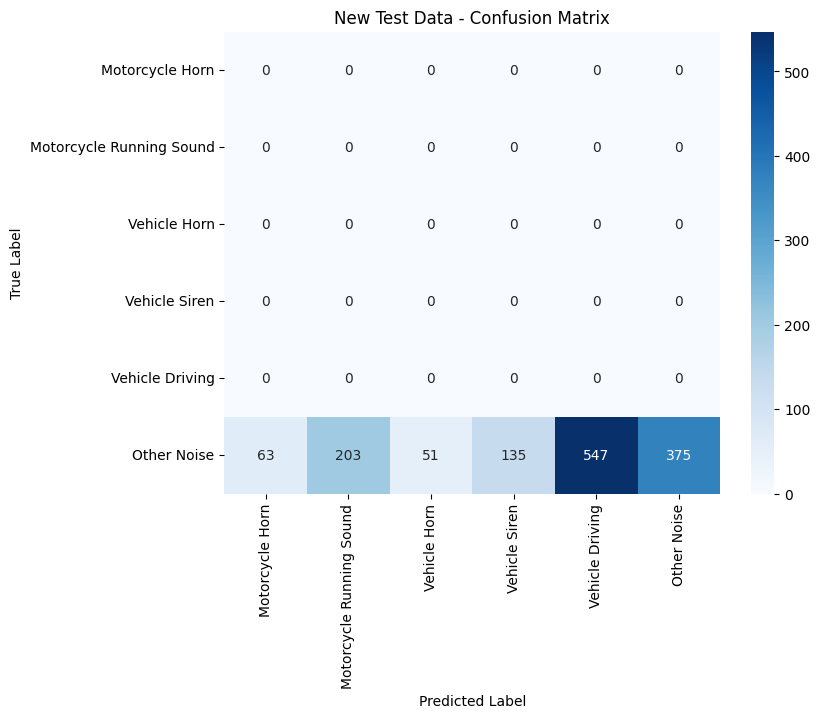


New Test Data Evaluation:
 Accuracy: 0.2729

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.27      0.43      1374

                accuracy                           0.27      1374
               macro avg       0.17      0.05      0.07      1374
            weighted avg       1.00      0.27      0.43      1374


--- Sample Predictions ---
1/1 [==============================] - 0s 18ms/step
Sample 0: True = 기타소음, Predicted = 기타소음, Confidence = 0.9104
1/1 [==============================] - 0s 18ms/step
Sample 1: True = 기타소음, Predicted = 기타소음, Confidence = 0.5397


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 18ms/step
Sample 2: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 3: True = 기타소음, Predicted = 기타소음, Confidence = 0.9505
1/1 [==============================] - 0s 17ms/step
Sample 4: True = 기타소음, Predicted = 차량사이렌, Confidence = 0.9607
1/1 [==============================] - 0s 18ms/step
Sample 5: True = 기타소음, Predicted = 이륜차경적, Confidence = 0.7130
1/1 [==============================] - 0s 17ms/step
Sample 6: True = 기타소음, Predicted = 차량경적, Confidence = 0.5828
1/1 [==============================] - 0s 17ms/step
Sample 7: True = 기타소음, Predicted = 기타소음, Confidence = 0.3788
1/1 [==============================] - 0s 17ms/step
Sample 8: True = 기타소음, Predicted = 기타소음, Confidence = 0.9965
1/1 [==============================] - 0s 17ms/step
Sample 9: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#############################################
# Part 0. 모델 로드 및 데이터 로드
#############################################
model_file = "resnet_model_modified_v4.h5"
test_file = "untrained other noises.csv"  # 새로운 테스트 데이터 파일 경로를 여기에 입력하세요.

loaded_model = load_model(model_file)
test_df = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩 (학습 데이터와 동일한 라벨 매핑 사용)
#############################################
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

y_test = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC)
#############################################
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_test = test_df[mfcc_columns].values

# Reshape: (samples, 50) -> (samples, 50, 1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_test shape:", X_test.shape)

#############################################
# Part 3. 평가 함수 정의 및 적용 (영어 라벨 표시)
#############################################
def evaluate_model(model, X, y_true, dataset_name="Test"):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} - Confusion Matrix")
    plt.show()

    print(f"\n{dataset_name} Evaluation:")
    print(f" Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=english_labels))
    return acc

# 평가: 테스트 데이터 평가
test_acc = evaluate_model(loaded_model, X_test, y_test, dataset_name="New Test Data")

#############################################
# Part 4. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_test[i]]
    pred_lbl = index_to_label[np.argmax(loaded_model.predict(X_test[i:i+1]))]
    conf = np.max(loaded_model.predict(X_test[i:i+1]))
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Confidence = {conf:.4f}")

## 2) V6

X_test shape: (1374, 50, 1)
43/43 [==============================] - 1s 7ms/step


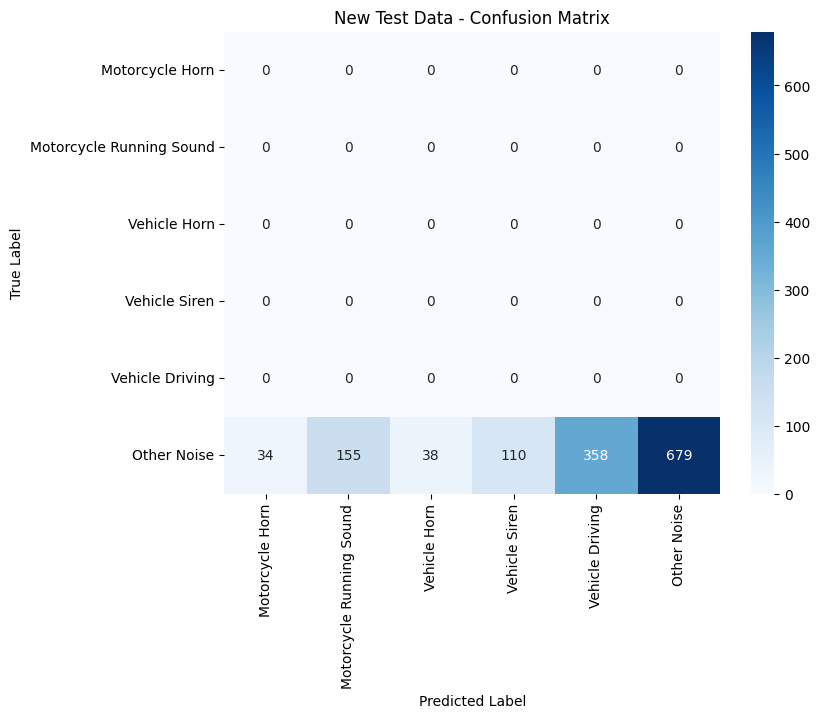


New Test Data Evaluation:
 Accuracy: 0.4942

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.49      0.66      1374

                accuracy                           0.49      1374
               macro avg       0.17      0.08      0.11      1374
            weighted avg       1.00      0.49      0.66      1374


--- Sample Predictions ---
1/1 [==============================] - 0s 18ms/step
Sample 0: True = 기타소음, Predicted = 기타소음, Confidence = 0.9993
1/1 [==============================] - 0s 17ms/step
Sample 1: True = 기타소음, Predicted = 차량사이렌, Confidence = 0.9512


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 17ms/step
Sample 2: True = 기타소음, Predicted = 기타소음, Confidence = 0.9994
1/1 [==============================] - 0s 17ms/step
Sample 3: True = 기타소음, Predicted = 기타소음, Confidence = 0.9999
1/1 [==============================] - 0s 17ms/step
Sample 4: True = 기타소음, Predicted = 이륜차경적, Confidence = 0.5288
1/1 [==============================] - 0s 18ms/step
Sample 5: True = 기타소음, Predicted = 차량경적, Confidence = 0.6720
1/1 [==============================] - 0s 17ms/step
Sample 6: True = 기타소음, Predicted = 이륜차경적, Confidence = 0.9908
1/1 [==============================] - 0s 17ms/step
Sample 7: True = 기타소음, Predicted = 기타소음, Confidence = 0.9408
1/1 [==============================] - 0s 17ms/step
Sample 8: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 18ms/step
Sample 9: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#############################################
# Part 0. 모델 로드 및 데이터 로드
#############################################
model_file = "resnet_model_modified_v6.h5"
test_file = "untrained other noises.csv"  # 새로운 테스트 데이터 파일 경로를 여기에 입력하세요.

loaded_model = load_model(model_file)
test_df = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩 (학습 데이터와 동일한 라벨 매핑 사용)
#############################################
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

y_test = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC)
#############################################
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_test = test_df[mfcc_columns].values

# Reshape: (samples, 50) -> (samples, 50, 1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_test shape:", X_test.shape)

#############################################
# Part 3. 평가 함수 정의 및 적용 (영어 라벨 표시)
#############################################
def evaluate_model(model, X, y_true, dataset_name="Test"):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} - Confusion Matrix")
    plt.show()

    print(f"\n{dataset_name} Evaluation:")
    print(f" Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=english_labels))
    return acc

# 평가: 테스트 데이터 평가
test_acc = evaluate_model(loaded_model, X_test, y_test, dataset_name="New Test Data")

#############################################
# Part 4. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_test[i]]
    pred_lbl = index_to_label[np.argmax(loaded_model.predict(X_test[i:i+1]))]
    conf = np.max(loaded_model.predict(X_test[i:i+1]))
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Confidence = {conf:.4f}")

## 3) V7

X_test shape: (1374, 50, 1)
43/43 [==============================] - 1s 7ms/step


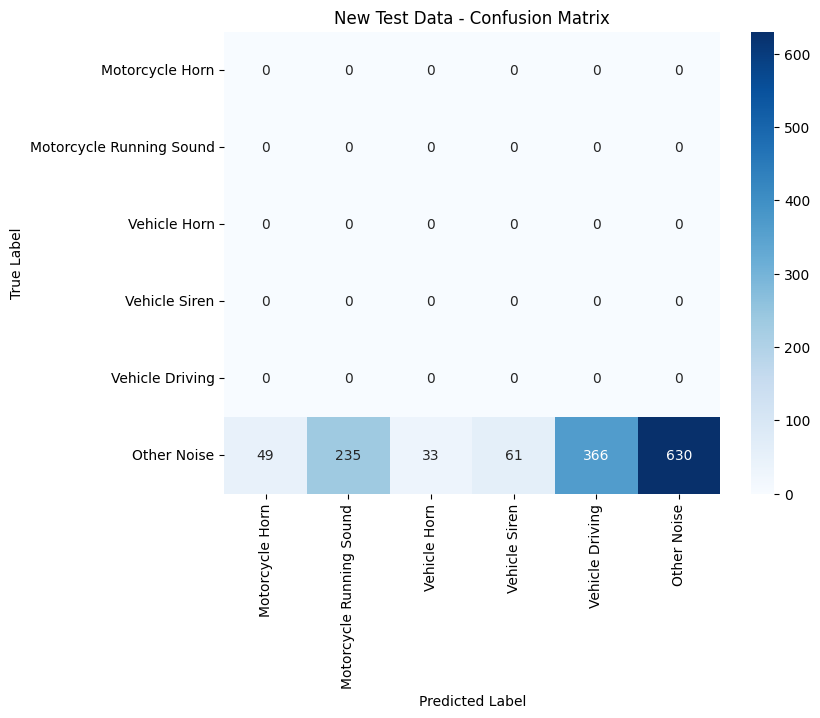


New Test Data Evaluation:
 Accuracy: 0.4585

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.00      0.00      0.00         0
Motorcycle Running Sound       0.00      0.00      0.00         0
            Vehicle Horn       0.00      0.00      0.00         0
           Vehicle Siren       0.00      0.00      0.00         0
         Vehicle Driving       0.00      0.00      0.00         0
             Other Noise       1.00      0.46      0.63      1374

                accuracy                           0.46      1374
               macro avg       0.17      0.08      0.10      1374
            weighted avg       1.00      0.46      0.63      1374


--- Sample Predictions ---
1/1 [==============================] - 0s 17ms/step
Sample 0: True = 기타소음, Predicted = 차량경적, Confidence = 0.8904
1/1 [==============================] - 0s 17ms/step
Sample 1: True = 기타소음, Predicted = 차량경적, Confidence = 0.5041


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 17ms/step
Sample 2: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 3: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 18ms/step
Sample 4: True = 기타소음, Predicted = 차량경적, Confidence = 0.9363
1/1 [==============================] - 0s 17ms/step
Sample 5: True = 기타소음, Predicted = 기타소음, Confidence = 0.9571
1/1 [==============================] - 0s 18ms/step
Sample 6: True = 기타소음, Predicted = 이륜차경적, Confidence = 0.8298
1/1 [==============================] - 0s 18ms/step
Sample 7: True = 기타소음, Predicted = 기타소음, Confidence = 0.7948
1/1 [==============================] - 0s 18ms/step
Sample 8: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 9: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#############################################
# Part 0. 모델 로드 및 데이터 로드
#############################################
model_file = "resnet_model_modified_v7.h5"
test_file = "untrained other noises.csv"  # 새로운 테스트 데이터 파일 경로를 여기에 입력하세요.

loaded_model = load_model(model_file)
test_df = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩 (학습 데이터와 동일한 라벨 매핑 사용)
#############################################
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

y_test = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC)
#############################################
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_test = test_df[mfcc_columns].values

# Reshape: (samples, 50) -> (samples, 50, 1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_test shape:", X_test.shape)

#############################################
# Part 3. 평가 함수 정의 및 적용 (영어 라벨 표시)
#############################################
def evaluate_model(model, X, y_true, dataset_name="Test"):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} - Confusion Matrix")
    plt.show()

    print(f"\n{dataset_name} Evaluation:")
    print(f" Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=english_labels))
    return acc

# 평가: 테스트 데이터 평가
test_acc = evaluate_model(loaded_model, X_test, y_test, dataset_name="New Test Data")

#############################################
# Part 4. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_test[i]]
    pred_lbl = index_to_label[np.argmax(loaded_model.predict(X_test[i:i+1]))]
    conf = np.max(loaded_model.predict(X_test[i:i+1]))
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Confidence = {conf:.4f}")